In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/content/customer_shopping_data.csv')
df.head(4)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM


In [25]:
df.drop(columns = ['invoice_no','customer_id','invoice_date'],axis = 1,inplace = True)

In [26]:
df["payment_method"].unique()
df["category"].unique()
df['gender'].unique()
df['shopping_mall'].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#df['payment_method'] = le.fit_transform(df['payment_method'])
#df['category'] = le.fit_transform(df['category'])
#df['gender'] = le.fit_transform(df['gender'])
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [28]:
df.head()

,gender,age,category,quantity,price,payment_method,shopping_mall
0,0,28,1,5,1500.40,1,4
1,1,21,4,3,1800.51,2,2
2,1,20,1,1,300.08,0,6
3,0,66,4,5,3000.85,1,7
4,0,53,0,4,60.60,0,4


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for cols in df.columns:
  df[cols] = scaler.fit_transform(df[[cols]])

In [30]:
df.head(5)

,gender,age,category,quantity,price,payment_method,shopping_mall
0,0.0,0.196078,0.142857,1.00,0.285078,0.5,0.444444
1,1.0,0.058824,0.571429,0.50,0.342299,1.0,0.222222
2,1.0,0.039216,0.142857,0.00,0.056218,0.0,0.666667
3,0.0,0.941176,0.571429,1.00,0.571163,0.5,0.777778
4,0.0,0.686275,0.000000,0.75,0.010557,0.0,0.444444


In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0,verbose = 2,init = "k-means++")

kmeans.fit(df)
#aim :- we wants the wcss score to be unchanged until less iterations

Initialization complete
Iteration 0, inertia 97843.30113866105.
Iteration 1, inertia 54041.61420347733.
Iteration 2, inertia 47321.904573869455.
Iteration 3, inertia 46797.14801304254.
Iteration 4, inertia 46675.34871334496.
Converged at iteration 4: strict convergence.


KMeans(n_clusters=3, random_state=0, verbose=2)

In [52]:
kmeans.cluster_centers_

array([[ 1.00000000e+00,  4.97799360e-01,  3.93413741e-01,
         5.00800500e-01,  1.30738037e-01,  3.77160725e-01,
         5.24347161e-01],
       [-2.04170014e-13,  5.00933830e-01,  3.95908667e-01,
         4.99726508e-01,  1.31379815e-01, -2.41695552e-13,
         5.25456763e-01],
       [-2.36421993e-13,  4.97604992e-01,  3.95007170e-01,
         5.01834835e-01,  1.29264738e-01,  6.81390835e-01,
         5.23067695e-01]])

In [53]:
kmeans.inertia_

46675.34871334496

In [54]:
#how better the clustering model is

from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_)

0.22882510630491493

In [55]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 2], dtype=int32)

In [56]:
kmeans.inertia_ #for k=3, you have wcss distance

46675.34871334496

In [57]:
#to sleect K(centroid)>> elbow method
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [58]:
wcss

[77406.37739897637,
 53498.47840842391,
 47844.72910416753,
 42046.47227082113,
 40399.03404564636,
 36394.84942175989,
 33980.21877162162,
 34481.2512158361,
 31656.77455171951]

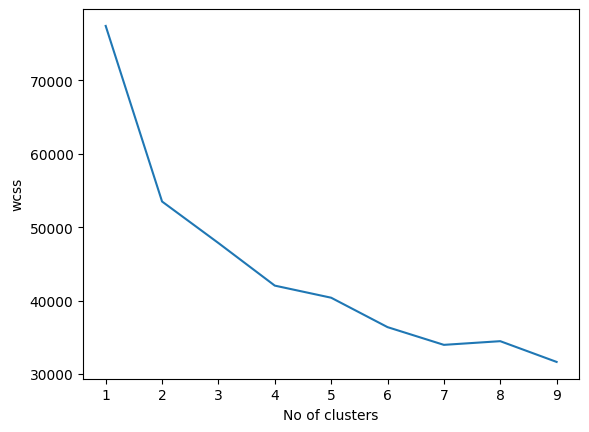

In [59]:
#plot an elbow curve
plt.plot(range(1, 10), wcss)
plt.xticks(range(1, 10))
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()

In [60]:
!pip install kneed

In [61]:
from kneed import KneeLocator
k1 = KneeLocator(range(1, 10), wcss, curve='convex', direction = 'decreasing')

In [62]:
k1.elbow

4

In [63]:
silhouette_coeff = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coeff.append(score)

In [64]:
silhouette_coeff
# when the wcss score stops changing it means that we gets optimal k
# as k increases the wcss also decreases

[0.14903844890012846,
 0.23482539549861,
 0.204104417638515,
 0.19828171812892512,
 0.1813682618281955,
 0.17996392855896656,
 0.18183747095326688,
 0.17733580022910275]

In [ ]:
#Max_iter :- no of times algorithm calculates euclidean distance + relocate centroids
# init:- methods of initialization (random_initialization,k-means++ initialization)
# n_init:- no of centroids initializes
# n_clusters:- no of clusters you will be getting
# tolarance :- how much distance you want to enough to get datapoint to be clustered